In [1]:
#importing required liberary for data set 
import plotly.express as px
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [52]:
df= pd.read_csv("train_v9rqX0R (1).csv")
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [3]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [4]:
#replace values
df['Item_Fat_Content'].replace(['LF','reg','low fat'],['Low Fat','Regular','Low Fat'],inplace = True)
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [5]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [6]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [7]:
df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [8]:
df.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [9]:
df.shape

(8523, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Most of the columns contain [Object] type of data.

In data set [Outlet_size] contain huge no of null value and also [Item_Weight] contain some null value 

here are some total  null value in dataset

In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
df.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [13]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

# Exploratory Analysis and Visualization

C:\Users\Shivam\AppData\Local\Temp\ipykernel_20856\1270121920.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'], hist=True, kde=True, color='darkblue')


<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Density'>

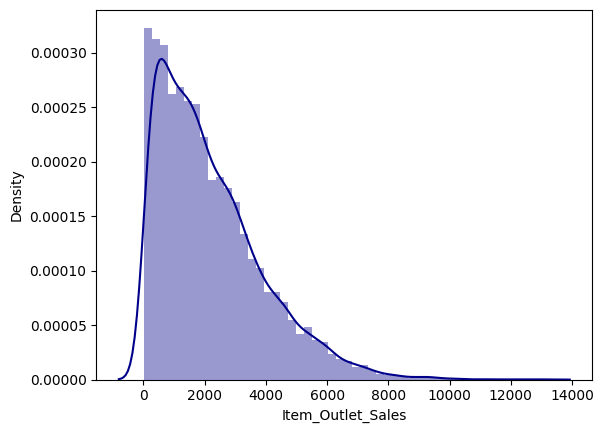

In [14]:
sns.distplot(df['Item_Outlet_Sales'], hist=True, kde=True, color='darkblue')

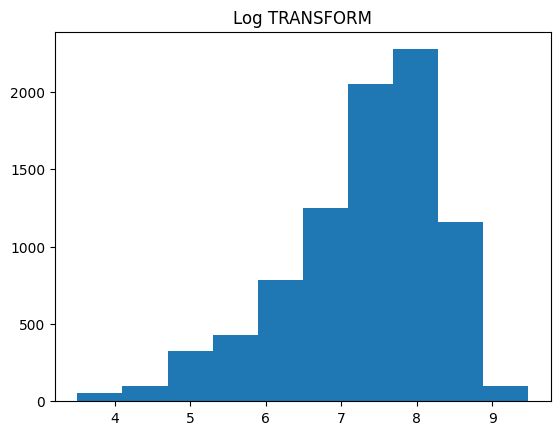

In [15]:
plt.hist(np.log(df['Item_Outlet_Sales']));
plt.title('Log TRANSFORM')
plt.show()

C:\Users\Shivam\AppData\Local\Temp\ipykernel_20856\2733696390.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'], hist=True, kde=True, color='darkblue')


<AxesSubplot: xlabel='Item_MRP', ylabel='Density'>

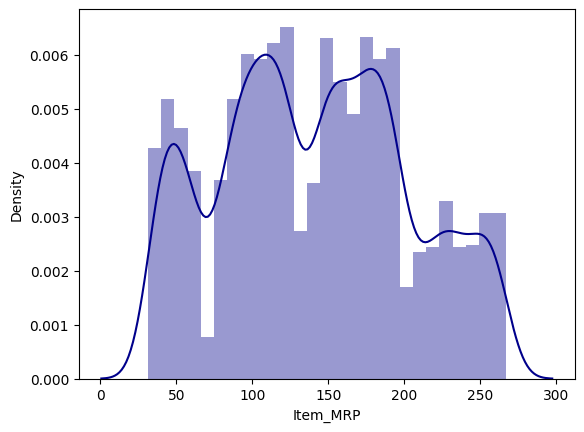

In [16]:
sns.distplot(df['Item_MRP'], hist=True, kde=True, color='darkblue')

C:\Users\Shivam\AppData\Local\Temp\ipykernel_20856\1752152791.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'], hist=True, kde=True, color='darkblue')


<AxesSubplot: xlabel='Item_Weight', ylabel='Density'>

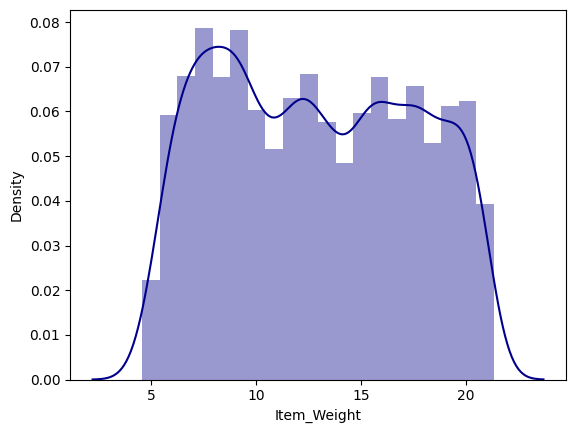

In [17]:
sns.distplot(df['Item_Weight'], hist=True, kde=True, color='darkblue')

C:\Users\Shivam\AppData\Local\Temp\ipykernel_20856\2359074678.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'], hist=True, kde=True, color='darkblue')


<AxesSubplot: xlabel='Item_Visibility', ylabel='Density'>

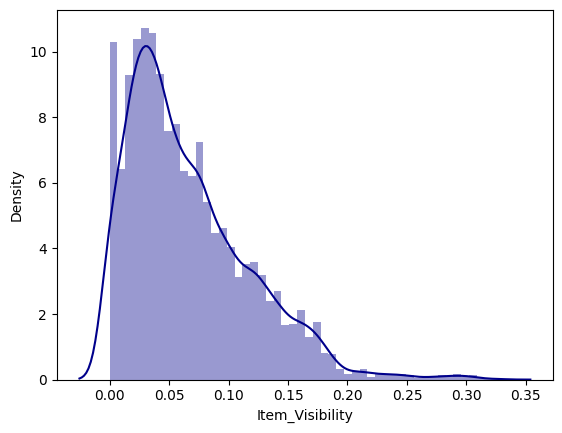

In [18]:
sns.distplot(df['Item_Visibility'], hist=True, kde=True, color='darkblue')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

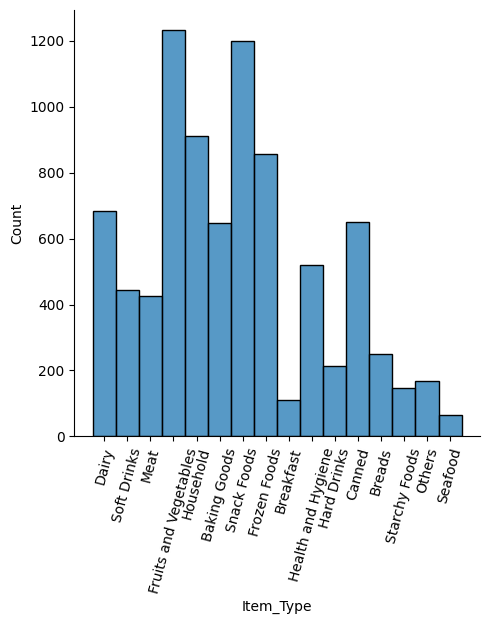

In [19]:
sns.displot(df.Item_Type)
plt.xticks(rotation=75)

<AxesSubplot: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

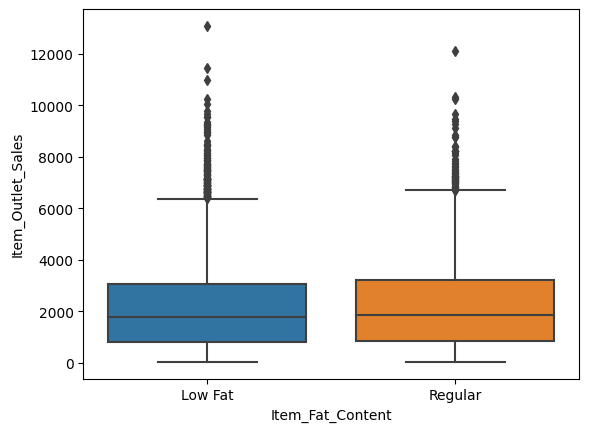

In [20]:
sns.boxplot(y='Item_Outlet_Sales' ,x='Item_Fat_Content',data=df )

<AxesSubplot: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

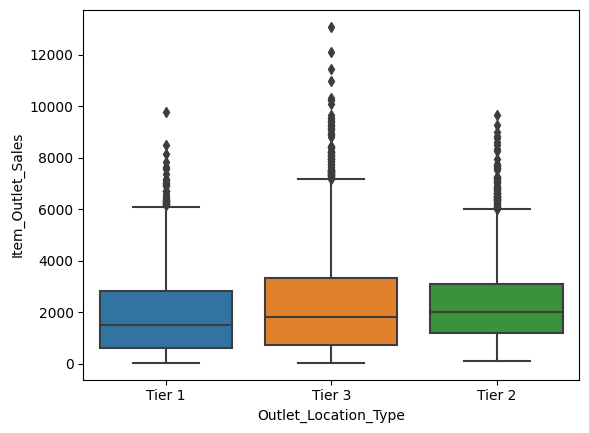

In [21]:
sns.boxplot(y='Item_Outlet_Sales' ,x='Outlet_Location_Type',data=df )

<AxesSubplot: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

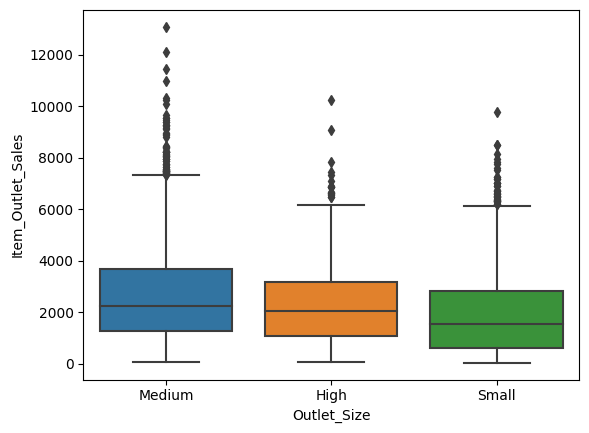

In [22]:
sns.boxplot(y='Item_Outlet_Sales' ,x='Outlet_Size',data=df )

<AxesSubplot: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

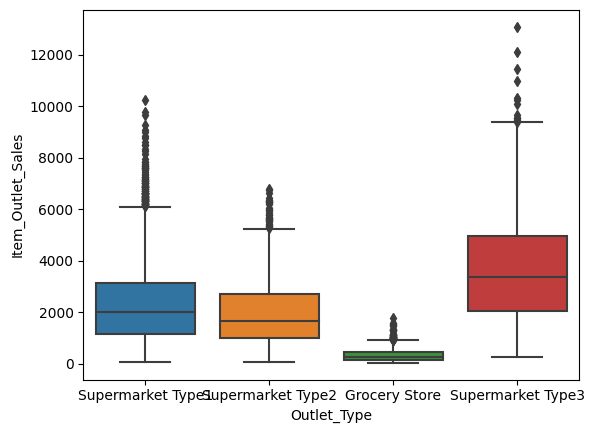

In [23]:
sns.boxplot(y='Item_Outlet_Sales' ,x='Outlet_Type',data=df )

In [24]:
px.histogram(df,x='Outlet_Location_Type',y='Item_Outlet_Sales'   ,color='Outlet_Size', title ='location type')

In [25]:
px.histogram(df,x='Outlet_Location_Type',y='Item_Outlet_Sales'  ,color='Item_Fat_Content', title ='location type')

In [26]:
fig= px.scatter(df,
               x='Item_MRP',
               y='Item_Outlet_Sales',
               color= 'Item_Fat_Content',
               opacity = 0.8,
              title = 'Item_MRP Vs Item_Outlet_Sales')
fig.update_traces(marker_size= 5)
fig.show()

In [27]:
fig= px.scatter(df,
               x='Item_Visibility',
               y='Item_Outlet_Sales',
               opacity = 0.8,
              title = 'Item_MRP Vs Item_Outlet_Sales')
fig.update_traces(marker_size= 5)
fig.show()

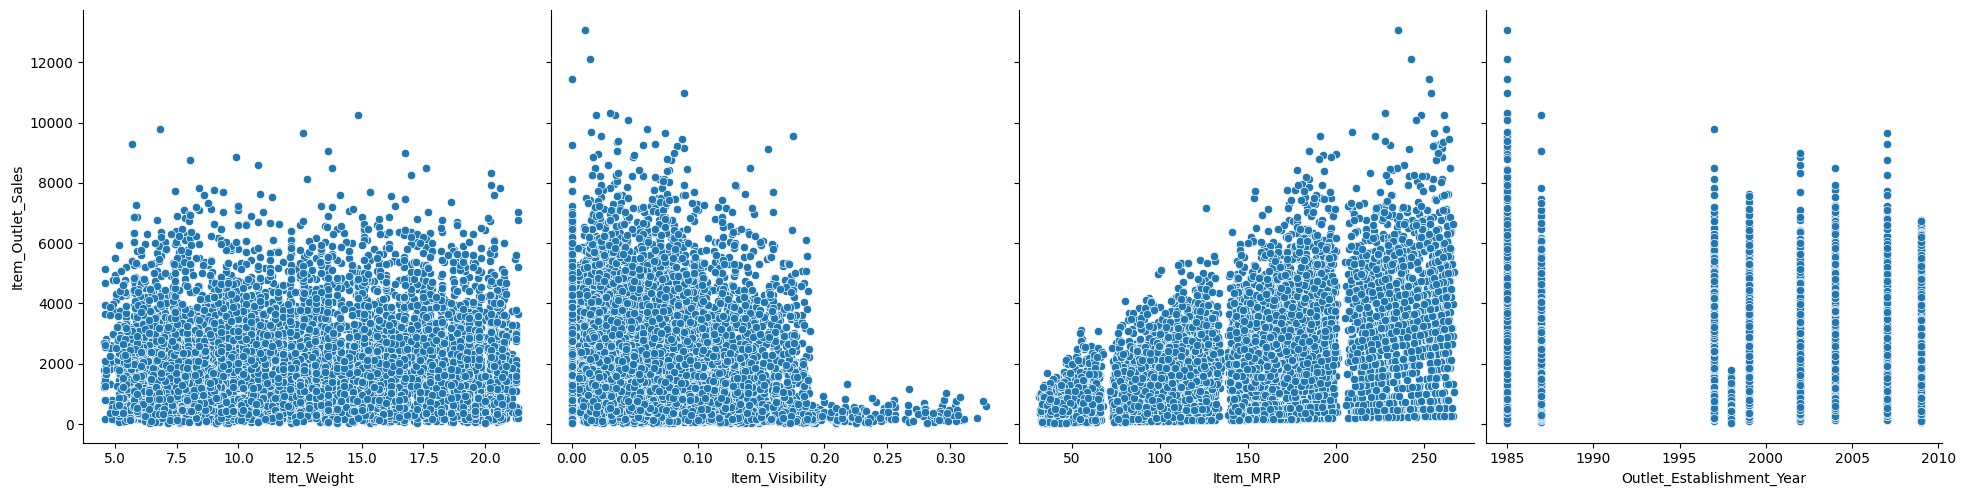

In [28]:
sns.pairplot(df, x_vars=['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year'], y_vars='Item_Outlet_Sales', height=5, aspect=1, kind='scatter')
plt.show()

In [29]:
df.skew(axis = 0)

C:\Users\Shivam\AppData\Local\Temp\ipykernel_20856\3517674506.py:1: FutureWarning:

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [30]:
df.kurtosis(axis = 0)

C:\Users\Shivam\AppData\Local\Temp\ipykernel_20856\2807195809.py:1: FutureWarning:

The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Item_Weight                 -1.227766
Item_Visibility              1.679445
Item_MRP                    -0.889769
Outlet_Establishment_Year   -1.205694
Item_Outlet_Sales            1.615877
dtype: float64

In [31]:
df.corr('spearman')

C:\Users\Shivam\AppData\Local\Temp\ipykernel_20856\1436705525.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014879  0.030822   
Item_Visibility              -0.014879         1.000000  0.005688   
Item_MRP                      0.030822         0.005688  1.000000   
Outlet_Establishment_Year    -0.009393        -0.054924  0.003782   
Item_Outlet_Sales             0.015062        -0.115076  0.562986   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.009393           0.015062  
Item_Visibility                            -0.054924          -0.115076  
Item_MRP                                    0.003782           0.562986  
Outlet_Establishment_Year                   1.000000           0.042947  
Item_Outlet_Sales                           0.042947           1.000000

C:\Users\Shivam\AppData\Local\Temp\ipykernel_20856\3822154386.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

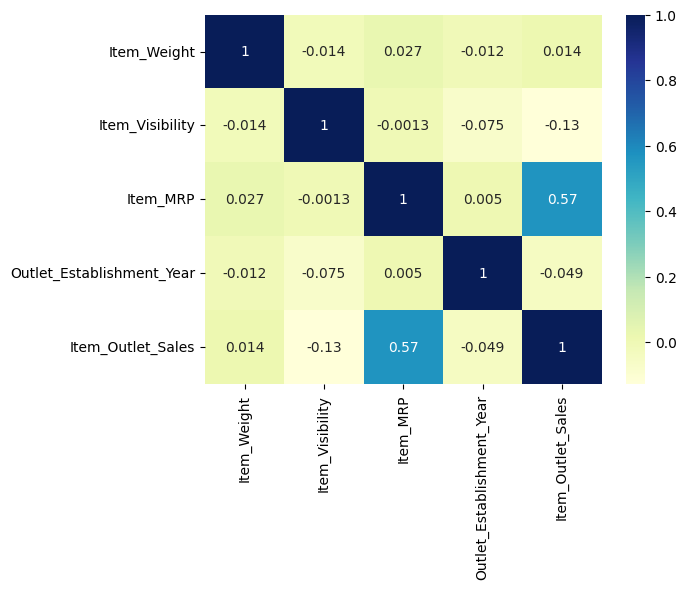

In [32]:
sns.heatmap(df.corr(),cmap="YlGnBu", annot = True)

C:\Users\Shivam\AppData\Local\Temp\ipykernel_20856\858843565.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

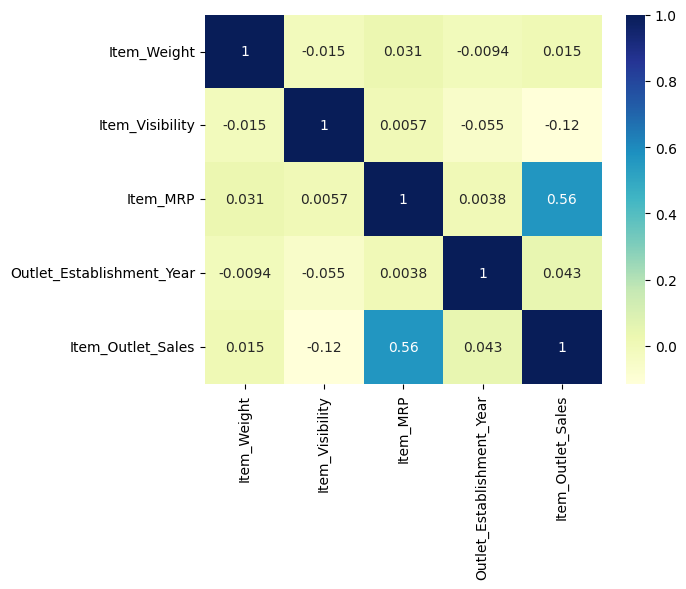

In [33]:
sns.heatmap(df.corr('spearman'),cmap="YlGnBu", annot = True)

# Missing Values

<AxesSubplot: >

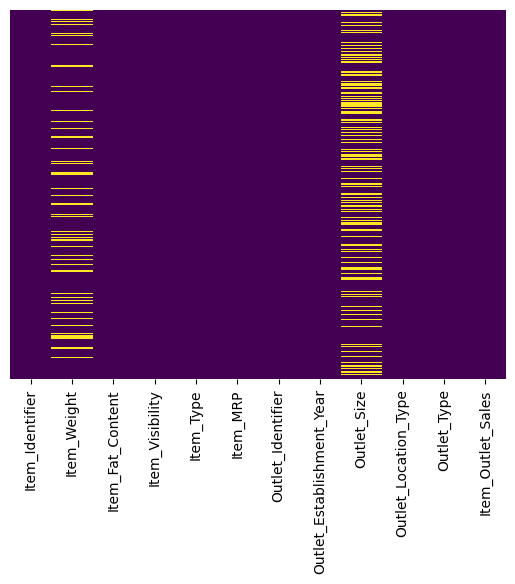

In [57]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False,cmap='viridis')


## for Item_Weight 

C:\Users\Shivam\AppData\Local\Temp\ipykernel_20856\1752152791.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='Item_Weight', ylabel='Density'>

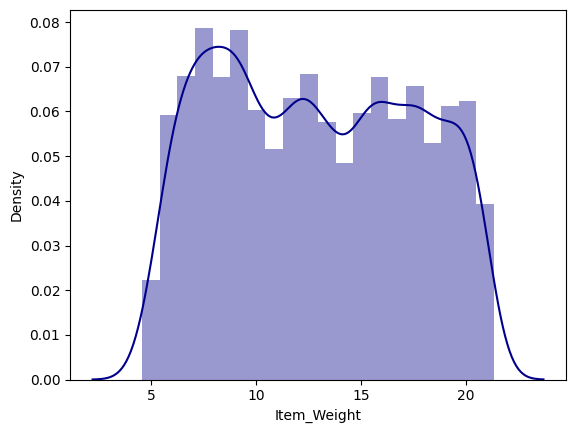

In [58]:
sns.distplot(df['Item_Weight'], hist=True, kde=True, color='darkblue')

In [64]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [59]:
df['Item_Weight'].fillna(df['Item_Weight'].mode(), inplace=True)

C:\Users\Shivam\AppData\Local\Temp\ipykernel_20856\1752152791.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='Item_Weight', ylabel='Density'>

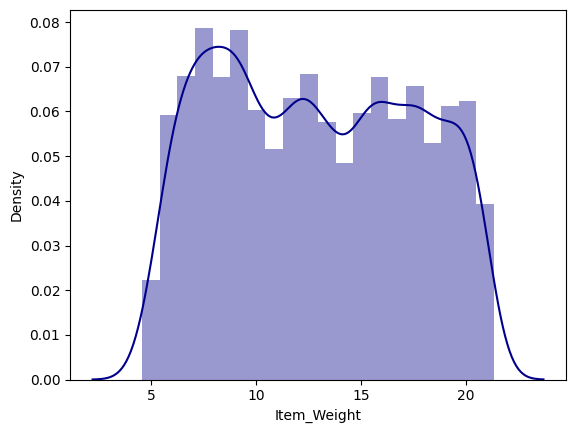

In [56]:
sns.distplot(df['Item_Weight'], hist=True, kde=True, color='darkblue')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

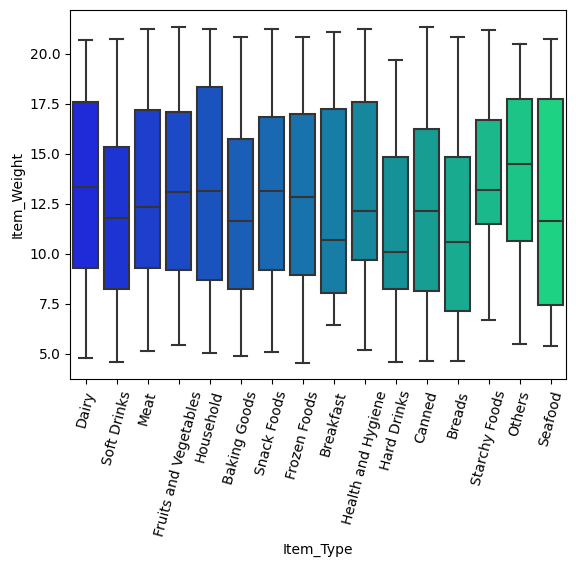

In [47]:
sns.boxplot(x='Item_Type',y='Item_Weight',data= df ,palette='winter')
plt.xticks(rotation=75)

In [ ]:
# def inpute_Item_Weight(Item_Weight):
    if pd.isnull(Item_Weight):
        if Item_Type=='Dairy':
            return 13.5
        if Item_Type=='Soft Drinks':
            return 12.1
        if Item_Type=='Meat':
            return 12.5
        if Item_Type=='Fruits and Vegetables':
            return 13.4
        if Item_Type=='Household':
            return 13.8
        if Item_Type=='Baking Goods':
            return 11.9
        if Item_Type=='Snack Foods':
            return  13.5
        else:
            return 12.5
    else :
        return Item_Weight

##  for  Outlet_Size

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

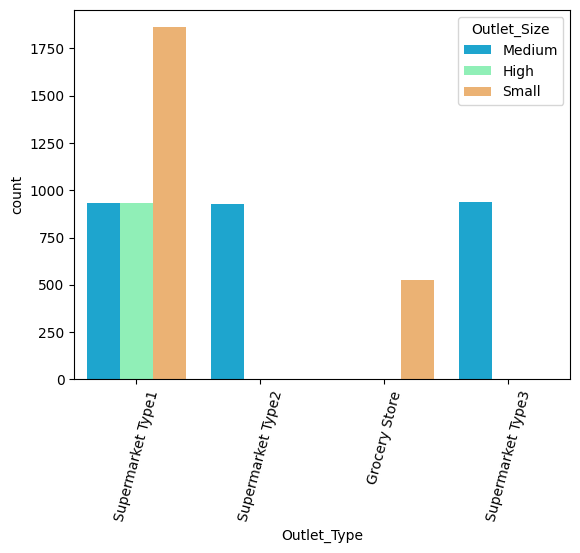

In [43]:
sns.countplot(x='Outlet_Type',hue='Outlet_Size', data= df,palette='rainbow')
plt.xticks(rotation=75)

<AxesSubplot: xlabel='Outlet_Size', ylabel='count'>

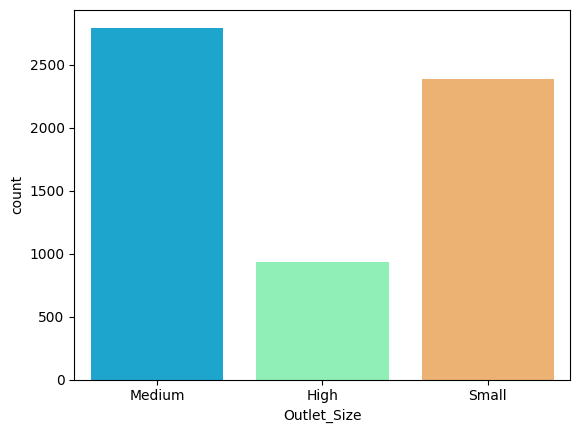

In [40]:
sns.countplot(x='Outlet_Size', data= df,palette='rainbow')

In [41]:
df['Outlet_Size'].replace('NaN','Missing Value',inplace = True)

# Linear Regression for Single and Multipal features

In [7]:
df1=np.log(df['Item_Outlet_Sales'])

In [8]:
x_dataset=df[['Item_MRP','Item_Visibility']]
y_dataset=df['Item_Outlet_Sales']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_dataset, y_dataset, train_size = 0.7, test_size = 0.3, random_state = 10000)

In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.3350790238994718
Best Params:  {'alpha': 0.01}


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
inputs = df[['Item_MRP']]
targets =df.Item_Outlet_Sales
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (8523, 1)
targes.shape : (8523,)


In [15]:
model.fit(inputs, targets)

LinearRegression()

# Binary Categories

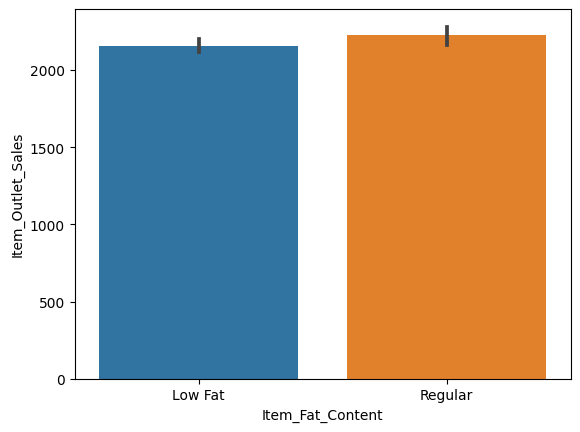

In [16]:
sns.barplot(data=df, x='Item_Fat_Content', y='Item_Outlet_Sales');

In [17]:
Item_Fat_Content_code= {'Low Fat': 0, 'Regular': 1}
df['Item_Fat_Content_code'] =df.Item_Fat_Content.map(Item_Fat_Content_code)

In [18]:
df.Item_Outlet_Sales.corr(df.Item_Fat_Content_code)

0.01871853362389439

# One-hot Encoding

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

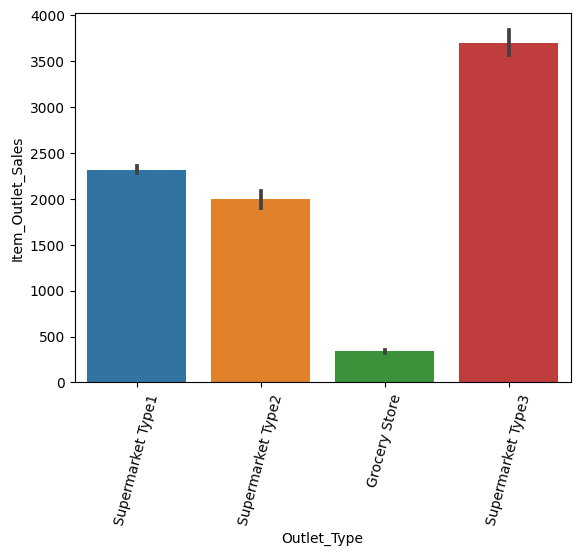

In [19]:
sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales')
plt.xticks(rotation=75)

In [39]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df[['Outlet_Type']])
enc.categories_

[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
        'Supermarket Type3'], dtype=object)]

In [40]:
one_hot = enc.transform(df[['Outlet_Type']]).toarray()
one_hot

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [41]:
df[['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
        'Supermarket Type3']] = one_hot

In [42]:
df.Item_Outlet_Sales.corr(df['Grocery Store'])

-0.41172707980846845

In [25]:
df.Item_Outlet_Sales.corr(df['Supermarket Type3'])

0.3111920461639485

In [26]:
df.Item_Outlet_Sales.corr(df['Supermarket Type2'])

-0.03805854016447048

In [27]:
df.Item_Outlet_Sales.corr(df['Supermarket Type1'])

0.10876525550853205

In [28]:
df1=np.log(df['Item_Outlet_Sales'])

In [33]:
x_dataset=df[['Item_MRP','Item_Visibility','Grocery Store','Supermarket Type3','Supermarket Type1']]
y_dataset=np.log(df['Item_Outlet_Sales'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Grocery Store              8523 non-null   float64
 13  Supermarket Type1          8523 non-null   float

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_dataset, y_dataset, train_size = 0.7, test_size = 0.3, random_state = 10000)

In [38]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.720622081084019
Best Params:  {'alpha': 1}


In [39]:
accuracy=grid_result.score(X_test,y_test)

In [40]:
accuracy

0.7150204074831339